In [4]:
#Random Forest Regressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [5]:
df=pd.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
df.tail()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A
321,631,170,9,77,44,31,11,4908,1457,30,775,357,249,A,W,408,4,3,1000.0,A


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [9]:
df.dtypes

,0
AtBat,int64
Hits,int64
HmRun,int64
Runs,int64
RBI,int64
Walks,int64
Years,int64
CAtBat,int64
CHits,int64
CHmRun,int64


In [10]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [11]:
df.isna().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [15]:

df.isna().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['League']=le.fit_transform(df['League'])
df['Division']=le.fit_transform(df['Division'])
df['NewLeague']=le.fit_transform(df['NewLeague'])

In [17]:
X=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [20]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [21]:
regressor=RandomForestRegressor(n_estimators=20,random_state=2)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [22]:
print(f"TRAIN MAE :",mean_absolute_error(y_train,regressor.predict(X_train)))
print(f"TRAIN MSE :",mean_squared_error(y_train,regressor.predict(X_train)))
print(f"TRAIN RMSE :",np.sqrt(mean_squared_error(y_train,regressor.predict(X_train))))

TRAIN MAE : 2.8144444444444443
TRAIN MSE : 13.81398888888889
TRAIN RMSE : 3.716717488441769


In [25]:
print(f"Test MAE :",mean_absolute_error(y_test,regressor.predict(X_test)))
print(f"Test MSE :",mean_squared_error(y_test,regressor.predict(X_test)))
print(f"Test RMSE :",np.sqrt(mean_squared_error(y_test,regressor.predict(X_test))))

Test MAE : 8.030412371134021
Test MSE : 112.28528350515467
Test RMSE : 10.59647505093815


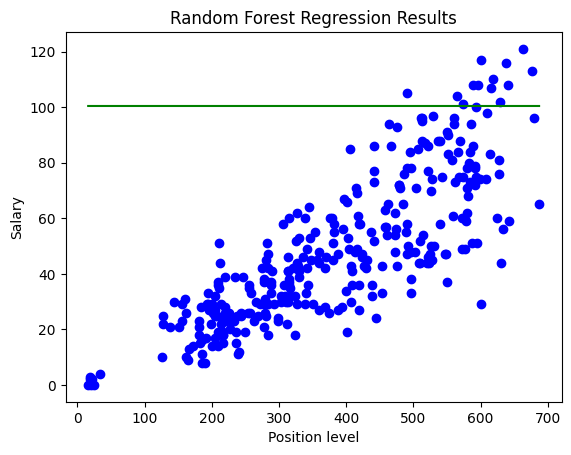

In [28]:
X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)
X_grid = X_grid.reshape(-1, 1)

X_grid_all_features = np.hstack([X_grid, np.repeat(X[:, 1].mean(), X_grid.shape[0]).reshape(-1, 1),
                               np.repeat(X[:, 2].mean(), X_grid.shape[0]).reshape(-1, 1),
                               np.repeat(X[:, 3].mean(), X_grid.shape[0]).reshape(-1, 1)])

plt.scatter(X[:, 0], y, color='blue')
plt.plot(X_grid, regressor.predict(X_grid_all_features), color='green')

plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()